<a href="https://colab.research.google.com/github/linndemberg1/MachineLearning/blob/main/Aula02_EX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Melhor solução encontrada: x = 0.8512, f(x) = 1.8506


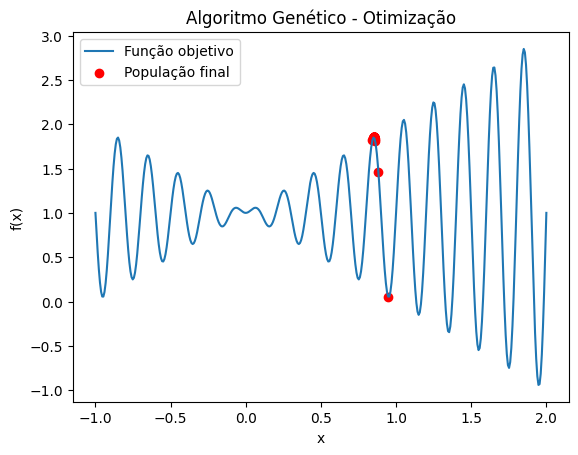

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Função objetivo
def fitness(x):
    return x * np.sin(10 * np.pi * x) + 1

# Parâmetros do GA
pop_size = 50       # tamanho da população
n_generations = 100 # número de gerações
mutation_rate = 0.1
bounds = (-1, 2)    # intervalo de busca para x

# Inicialização da população
population = np.random.uniform(bounds[0], bounds[1], pop_size)

# Evolução
for generation in range(n_generations):
    # Avaliação da população
    fitness_values = fitness(population)

    # Seleção por torneio
    selected = []
    for _ in range(pop_size):
        i, j = random.sample(range(pop_size), 2)
        winner = population[i] if fitness_values[i] > fitness_values[j] else population[j]
        selected.append(winner)
    selected = np.array(selected)

    # Crossover (média simples de pares)
    children = []
    for i in range(0, pop_size, 2):
        p1, p2 = selected[i], selected[i+1]
        alpha = random.random()
        child1 = alpha * p1 + (1-alpha) * p2
        child2 = alpha * p2 + (1-alpha) * p1
        children.extend([child1, child2])
    children = np.array(children)

    # Mutação
    for i in range(pop_size):
        if random.random() < mutation_rate:
            children[i] += np.random.uniform(-0.1, 0.1)
            children[i] = np.clip(children[i], bounds[0], bounds[1])

    # Atualiza população
    population = children

# Melhor solução encontrada
best_idx = np.argmax(fitness(population))
best_solution = population[best_idx]
best_value = fitness(best_solution)

print(f"Melhor solução encontrada: x = {best_solution:.4f}, f(x) = {best_value:.4f}")

# Visualização
x = np.linspace(bounds[0], bounds[1], 400)
y = fitness(x)
plt.plot(x, y, label="Função objetivo")
plt.scatter(population, fitness(population), color='red', label="População final")
plt.title("Algoritmo Genético - Otimização")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()


Melhor distância encontrada: 2.9030677377778753
Melhor caminho: [8, np.int64(3), np.int64(5), np.int64(0), np.int64(4), np.int64(1), np.int64(6), np.int64(9), np.int64(7), np.int64(2), 8]


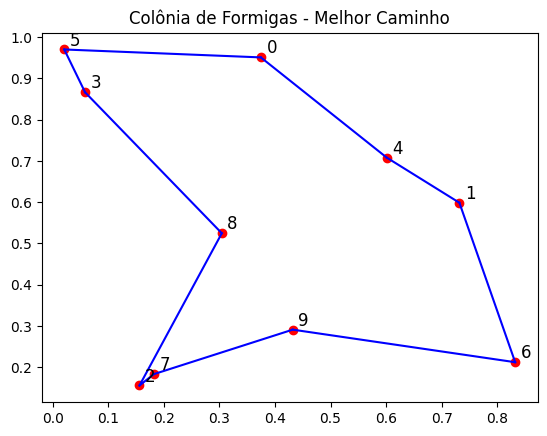

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Número de cidades
n_cities = 10
np.random.seed(42)

# Coordenadas das cidades (aleatórias em 2D)
cities = np.random.rand(n_cities, 2)

# Matriz de distâncias
dist_matrix = np.zeros((n_cities, n_cities))
for i in range(n_cities):
    for j in range(n_cities):
        if i != j:
            dist_matrix[i][j] = np.linalg.norm(cities[i] - cities[j])

# Parâmetros do ACO
n_ants = 20
n_iterations = 100
alpha = 1      # importância do feromônio
beta = 5       # importância da heurística (1/distância)
rho = 0.5      # taxa de evaporação
Q = 100        # quantidade de feromônio depositado

# Inicializa feromônio
pheromone = np.ones((n_cities, n_cities))

best_length = float("inf")
best_path = None

for iteration in range(n_iterations):
    paths = []
    lengths = []

    for ant in range(n_ants):
        visited = [random.randint(0, n_cities-1)]

        # Constrói caminho
        for _ in range(n_cities - 1):
            i = visited[-1]
            prob = []
            for j in range(n_cities):
                if j not in visited:
                    tau = pheromone[i][j] ** alpha
                    eta = (1.0 / dist_matrix[i][j]) ** beta
                    prob.append(tau * eta)
                else:
                    prob.append(0)
            prob = np.array(prob)
            prob /= prob.sum()
            next_city = np.random.choice(range(n_cities), p=prob)
            visited.append(next_city)

        visited.append(visited[0])  # retorna à cidade inicial
        length = sum(dist_matrix[visited[i]][visited[i+1]] for i in range(n_cities))

        paths.append(visited)
        lengths.append(length)

        # Atualiza melhor caminho
        if length < best_length:
            best_length = length
            best_path = visited

    # Atualização global do feromônio
    pheromone *= (1 - rho)
    for path, length in zip(paths, lengths):
        for i in range(n_cities):
            a, b = path[i], path[i+1]
            pheromone[a][b] += Q / length
            pheromone[b][a] += Q / length

print("Melhor distância encontrada:", best_length)
print("Melhor caminho:", best_path)

# Plotando as cidades e o melhor caminho
plt.scatter(cities[:,0], cities[:,1], c='red')
for i in range(n_cities):
    plt.text(cities[i][0]+0.01, cities[i][1]+0.01, str(i), fontsize=12)

for i in range(len(best_path)-1):
    a, b = best_path[i], best_path[i+1]
    plt.plot([cities[a][0], cities[b][0]], [cities[a][1], cities[b][1]], 'b-')

plt.title("Colônia de Formigas - Melhor Caminho")
plt.show()
